A liquor store owner in Iowa is looking to expand his business and open up a new location. I will determine the best location for a new liquor store based upon the data obtained from the state of Iowa's Alcoholic Beverages Division's website. I will use models and preditions, based on Iowa Counties, Zip Codes, Cost and Retail per bottle, Bottles Sold, and Volume sold to estimate how well he can expect to do in his new location.


# Clean the Data

Initial exploration and cleaning to make the data easier to work with, take out any symbols or spaces within the column names, change data types, fix erroneous zip codes, and add columns to represent the day and month of sales. I also created a column called 'Profit' which is the state bottle cost subtracted from the state bottle retail, multiplied by bottles sold. 

(State Bottle Retail - State Bottle Cost * Bottles Sold)

In [86]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/AntoniaCarlotta/Downloads/Iowa_Liquor_sales_sample_10pct.csv')

In [87]:
data.columns = [x.strip().replace(' ', '_') for x in data.columns]
data.columns = [x.strip().replace('(', '') for x in data.columns]
data.columns = [x.strip().replace(')', '') for x in data.columns]

In [88]:
data['State_Bottle_Retail'] = data['State_Bottle_Retail'].map(lambda x: str(x)[1::])
data['State_Bottle_Cost'] = data['State_Bottle_Cost'].map(lambda x: str(x)[1::])
data['Sale_Dollars'] = data['Sale_Dollars'].map(lambda x: str(x)[1::])

for column in ['State_Bottle_Cost', 'State_Bottle_Retail', 'Sale_Dollars']:
    data[column] = data[column].astype('float64')
    
data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)

In [89]:
data = data.dropna()

In [90]:
def fixzip(zip):
    if zip == '712-2':
        return '51529'
    elif zip == '56201':
        return '52601'
    elif zip == '50300':
        return '50310'
    elif zip == '52084':
        return '52804'
    elif zip == '52087':
        return '52057'
    elif zip == '52303':
        return '52403'
    else:
        return zip

data.Zip_Code = data.Zip_Code.apply(fixzip)

In [91]:
def datenum(date):
    return date.weekday()

daynumber = data.Date.apply(datenum)

def monthnum(date):
    return date.month

monthnumber = data.Date.apply(monthnum)

data["Day_Number"] = daynumber
data["Month_Number"] = monthnumber

In [112]:
data['Profit'] = (data['State_Bottle_Retail'] - data['State_Bottle_Cost']) * data['Bottles_Sold']

In [115]:
data.head()

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,...,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Day_Number,Month_Number,Profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,2,11,27.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,2,3,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,3,2,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,2,2,28.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,21.0,5.55,1,8,43.20


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
print 'Min. Bottles Sold: ', data['Bottles_Sold'].min()
print 'Max. Bottles Sold: ', data['Bottles_Sold'].max()

Min. Bottles Sold:  1
Max. Bottles Sold:  2508


In [95]:
print 'Min. Bottle Retail: ', data['State_Bottle_Retail'].min()
print 'Max. Bottle Retail: ', data['State_Bottle_Retail'].max()

Min. Bottle Retail:  1.34
Max. Bottle Retail:  637.5


In [100]:
print 'Mean sales per store: ', data['Sale_Dollars'].mean()
print 'Standard Deviation sales per store: ', data['Sale_Dollars'].std()
print 'Mean bottles sold per store: ', data['Bottles_Sold'].mean()
print 'Standard Deviation for bottles sold: ', data['Bottles_Sold'].std()
print 'Mean state bottle retail: ', data['State_Bottle_Retail'].mean()
print 'Standard Deviation state bottle reatil: ', data['State_Bottle_Retail'].std()
print 'Mean state bottle cost: ', data['State_Bottle_Cost'].mean()
print 'Standard Deviation state bottle cost: ', data['State_Bottle_Cost'].std()

Mean sales per store:  128.82854619
Standard Deviation sales per store:  383.477045872
Mean bottles sold per store:  9.87402788404
Standard Deviation for bottles sold:  24.0723351126
Mean state bottle retail:  14.6608482942
Standard Deviation state bottle reatil:  10.5591643443
Mean state bottle cost:  9.76329319835
Standard Deviation state bottle cost:  7.03978694338


In [116]:
data2 = data[['Bottles_Sold', 'Sale_Dollars', 'State_Bottle_Cost', 'State_Bottle_Retail', 'Profit']]

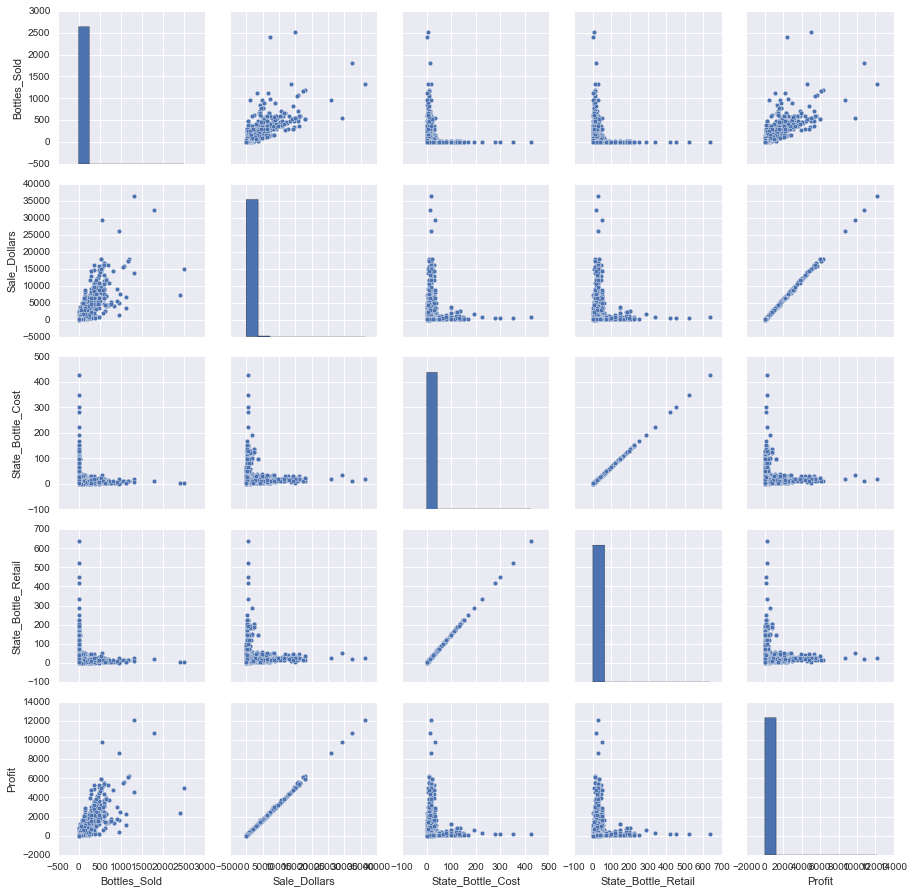

In [118]:
sns.pairplot(data2)

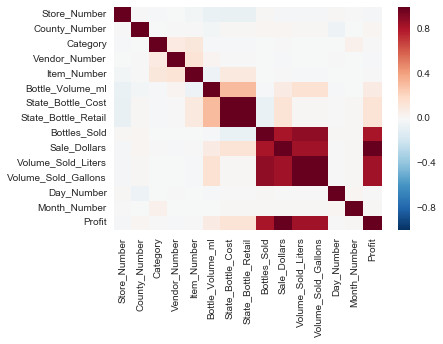

In [117]:
data_corr = data.corr()

ax = sns.heatmap(data_corr)

There is a strong relationship between State Bottle Cost and State Bottle Retail, as well as Sale (Dollars) and Profit. There also seems to be a relationship between Sale (Dollars) and Bottles Sold.


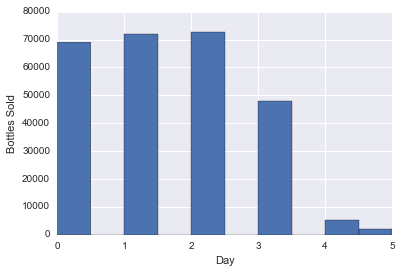

In [103]:
plt.hist(data['Day_Number'])

plt.xlabel("Day")
plt.ylabel('Bottles Sold')
plt.grid(True)

Monday, Tuesday, and Wednesday have the greatest sales, with close to or above 70,000 bottles sold. Thursday has close to 50,000 bottles sold. Friday and Saturday have less than 5,000 bottles sold, and there is no sales data for Sunday at all.

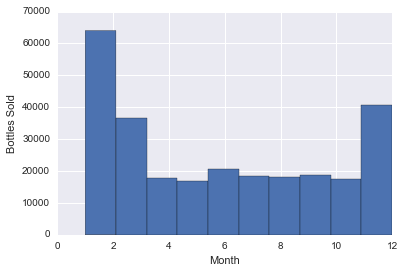

In [104]:
plt.hist(data['Month_Number'])

plt.xlabel("Month")
plt.ylabel('Bottles Sold')
plt.grid(True)

The winter months (December, January, and February) have more than double the sales of any other month in the year.

# Mine the data

In [202]:
totalsales = data.groupby(by=['Store_Number', 'City'], as_index=False)['Sale_Dollars', 'Bottles_Sold'].sum()

In [203]:
totalsales2 = data.groupby(by=['Store_Number', 'City'], as_index=False)['State_Bottle_Cost', 'State_Bottle_Retail'].mean()

In [223]:
totalsales.head()

,Store_Number,City,Sale_Dollars,Bottles_Sold
0,2106,CEDAR FALLS,176517.45,12573
1,2113,GOWRIE,11376.12,830
2,2130,WATERLOO,139440.02,9144
3,2152,ROCKWELL,8625.74,670
4,2178,WAUKON,29912.68,2408


In [318]:
totalsales3 = data.groupby(by=['Store_Number', 'Zip_Code'], as_index=False)['Sale_Dollars', 'Bottles_Sold'].sum()

In [319]:
totalsales3.to_csv('TotalSales3.csv')

In [270]:
totalsales.sort_values(by=["Store_Number", "Sale_Dollars"], inplace=True)
top20totalsales = (totalsales['Sale_Dollars'].nlargest(20))
top20totalsales

125     1215399.02
1033    1081941.88
36       531684.42
194      504057.23
200      398025.24
390      390443.65
324      310536.40
306      297914.31
193      295039.20
153      281356.57
204      262524.16
1270     236355.41
119      220741.89
123      218893.55
500      215110.71
92       212421.23
216      202673.94
147      200745.16
328      197377.85
134      192369.52
Name: Sale_Dollars, dtype: float64

The top two stores far outperform every other store (in Sale_Dollars) on the top 20 list.

In [204]:
totalsales2.head()

,Store_Number,City,State_Bottle_Cost,State_Bottle_Retail
0,2106,CEDAR FALLS,10.311273,15.479095
1,2113,GOWRIE,10.838152,16.267717
2,2130,WATERLOO,10.006398,15.015197
3,2152,ROCKWELL,8.526708,12.829193
4,2178,WAUKON,9.606576,14.432203


In [241]:
print 'Max Total Sales: ', totalsales['Sale_Dollars'].max().round(2)
print 'Min Total Sales: ', totalsales['Sale_Dollars'].min().round(2)
print 'Max Bottles Sold: ', totalsales['Bottles_Sold'].max()
print 'Min Bottles Sold: ', totalsales['Bottles_Sold'].min()

Max Total Sales:  1215399.02
Min Total Sales:  44.14
Max Bottles Sold:  76561
Min Bottles Sold:  1


In [188]:
top20saledollars = totalsales.sort_values(['Sale_Dollars'], ascending=False).head(20)

In [189]:
top20bottlessold = totalsales.sort_values(['Bottles_Sold'], ascending=False).head(20)

In [205]:
top20bottleretail = totalsales2.sort_values(['State_Bottle_Retail'], ascending=False).head(20)

In [207]:
top20bottlecost = totalsales2.sort_values(['State_Bottle_Cost'], ascending=False).head(20)

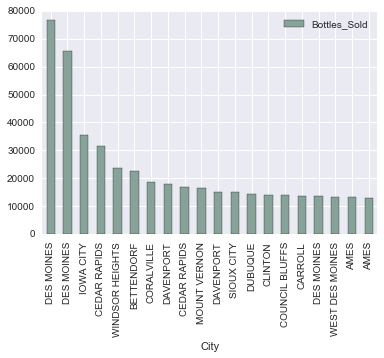

In [190]:
top20bottlessold.plot(kind='bar', x='City', y='Bottles_Sold')

Des Moines appears 3 times (and West Des Moines once), Cedar Rapids, Davenport, and Ames all appear twice on this list.

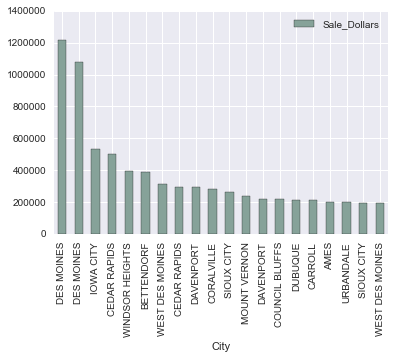

In [191]:
top20saledollars.plot(kind='bar', x='City', y='Sale_Dollars')

Des Moines and West Des Moines make up 4 of the top 20 in Bottles Sold. Cedar Rapids, Davenport, and Sioux City also appear twice. Though not exacty the same, this graph appears vey similar ot the graph above it, and it definitely seems as though the top selling stores are all situated within a few cities. 

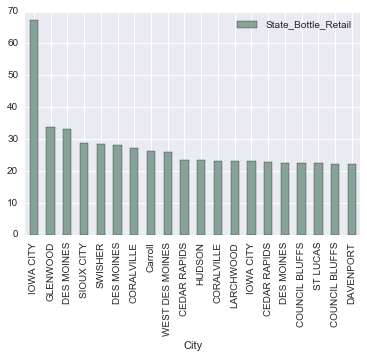

In [206]:
top20bottleretail.plot(kind='bar', x='City', y='State_Bottle_Retail')

Though again not exactly the same, the stores selling at the highest include repeats of the same cities from the previous graphs including Des Moines, Iowa City, Sioux City, Council Bluffs and Davenport, among others. 

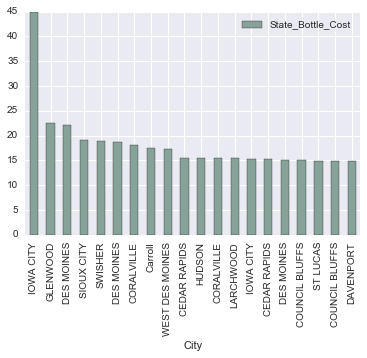

In [208]:
top20bottlecost.plot(kind='bar', x='City', y='State_Bottle_Cost')

The graph for Bottle Cost is virtually identical to that of Bottle Retail (just lower value on the y axis). 

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [289]:
totalsales.head()

,Store_Number,City,Sale_Dollars,Bottles_Sold
0,2106,CEDAR FALLS,176517.45,12573
1,2113,GOWRIE,11376.12,830
2,2130,WATERLOO,139440.02,9144
3,2152,ROCKWELL,8625.74,670
4,2178,WAUKON,29912.68,2408


In [312]:
models = sm.OLS(y, X)
results = models.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 5.180e+04
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:31:08   Log-Likelihood:                -14754.
No. Observations:                1379   AIC:                         2.951e+04
Df Residuals:                    1378   BIC:                         2.952e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Bottles_Sold    15.0055      0.066    227.606   

In [300]:
from sklearn import linear_model

X = totalsales['Bottles_Sold']
y = totalsales['Sale_Dollars']

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=13)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [301]:
X_train = np.transpose(np.matrix(X_train))
y_train = np.transpose(np.matrix(y_train))
X_test = np.transpose(np.matrix(X_test))
y_test = np.transpose(np.matrix(y_test))

In [302]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [304]:
print lr.intercept_
print lr.coef_

[-4842.1056707]
[[ 15.5763127]]


In [303]:
predictions = lr.predict(X_test)

## Plot your results

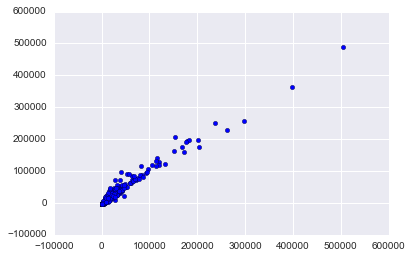

In [307]:
plt.scatter(y_test,predictions)

This linear nature of this scatter plot is good, as it shows the predictions and the actual results are close to accurate. It does not reveal anything groundbreaking, however, just that greater bottle sales mean greater sales in dollars, and that's what we are looking for in the next location we open. 

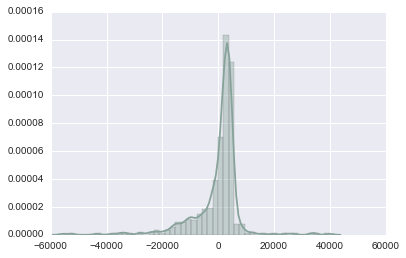

In [311]:
sns.distplot((y_test-predictions))

This plot shows the distribution of the difference of the actual y values and the predicted values. 

In [313]:
from sklearn import metrics

print 'Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions)
print 'Mean Squared Error: ', metrics.mean_squared_error(y_test, predictions)
print 'Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions))

Mean Absolute Error:  5449.67077061
Mean Squared Error:  78076691.6937
Root Mean Squared Error:  8836.10161178


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

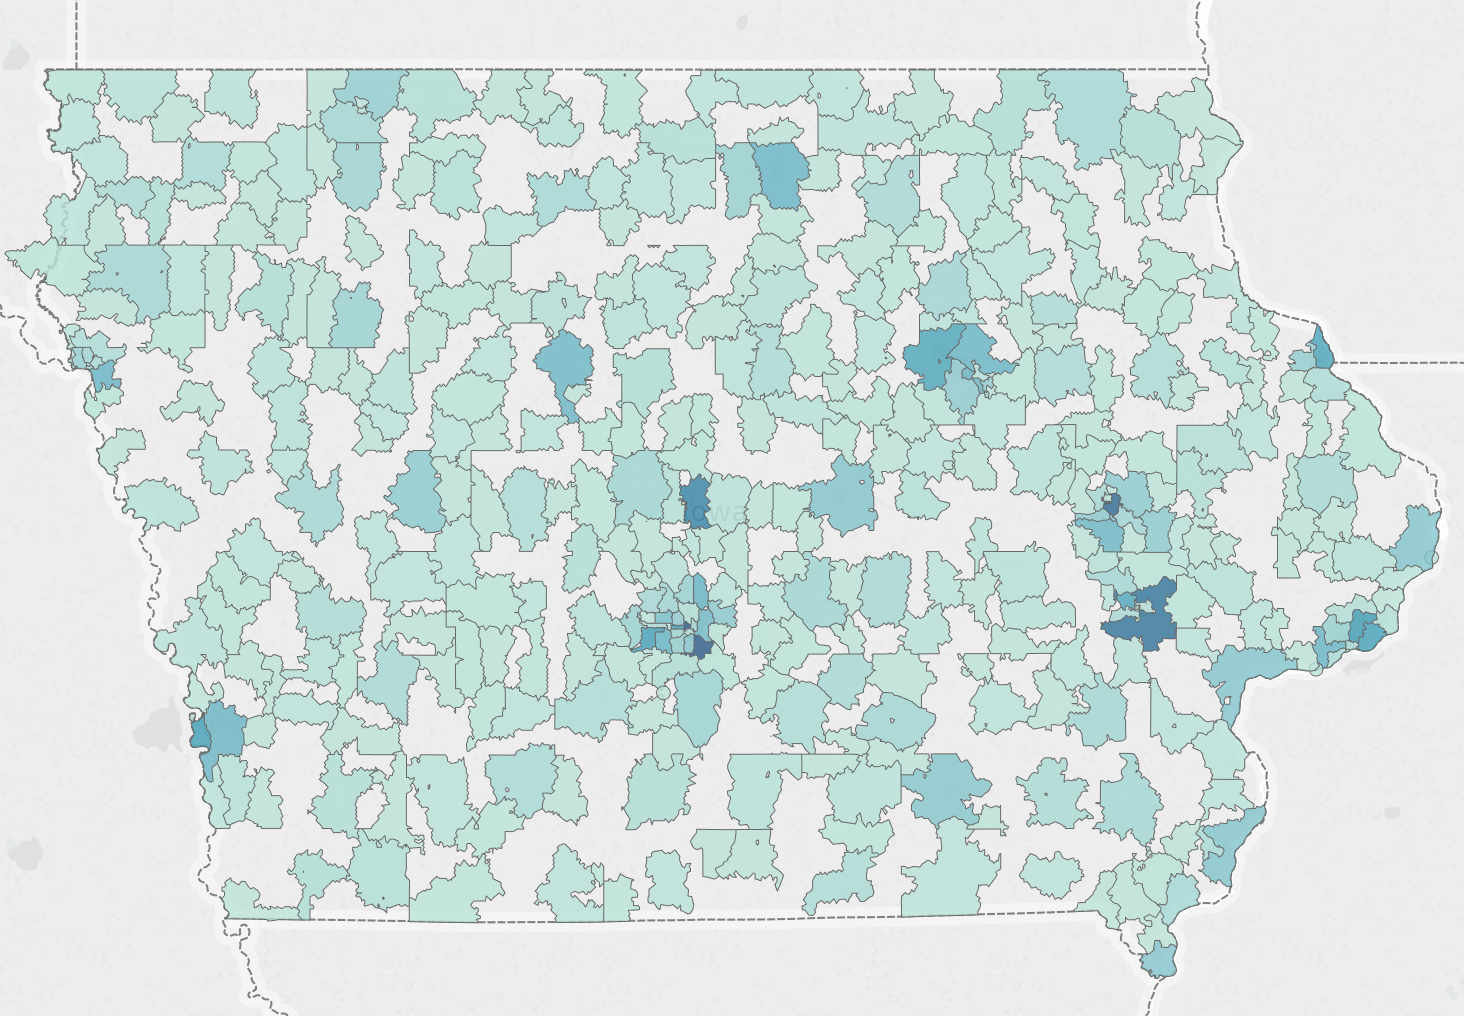

In [322]:
from IPython.display import Image
Image(filename='/Users/AntoniaCarlotta/Desktop/IowaHeatMap.png')

The darker spots on the Tableau map, with the higher bottles sold, include Des Moines, Sioux City, Council Bluffs, Ames, Iowa City, and Dubuque. These cities are all among the most densely populated in Iowa. What's most interesting, however, is that the very darkest spots on the map - Ames and Iowa City - are not the most populated on the map. Rather they are college towns, home to the University of Iowa and Iowa State University. The zip code nearest to Drake University, in west Des Moines, also has a very high rate of bottles sold.

The liquor store owner will find the biggest customer-base in a well-populated city, with a college nearby, that has not already been over-saturated with liquor stores. Ames, where Iowa State University is, already has 78 vendors, so it may be difficult to make a mark there. Iowa City, home to the University of Iowa, has 67 vendors. This is still a relatively large number, however Iowa City has a population 10,000 people greater than Ames, and it's college is comparably sized. Anecdotally, the University of Iowa is continuously ranked a "Top US Party School" by the Princeton Review, which would imply that alcohol purchases among students will be higher than average.

Other cities to be considered include:
- Des Moines, which has the greatest population in Iowa and a few city colleges and private universities
- Sioux City, which has just 39 vendors, but a significant population and many colleges